In [9]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

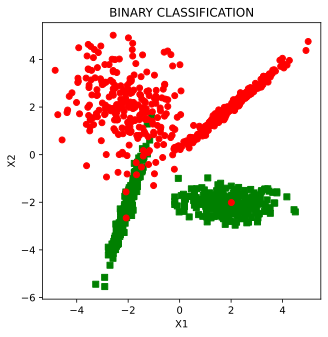

In [10]:
X,y = make_classification(n_samples=1000, n_features=2, 
                        n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                        n_clusters_per_class=2, weights=None, flip_y=0.01, 
                        class_sep=2.0, hypercube=True, shift=0.0, scale=1.0, 
                        shuffle=True, random_state=42)
# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Final accuracy: 96.7%


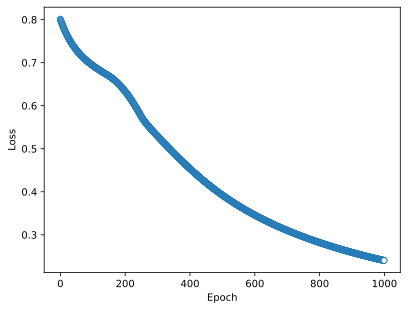

In [11]:
def CreateModel(learningRate):

  # model architecture
  ANN = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
        )

  # loss function
  lossfunc = nn.BCEWithLogitsLoss()

  # optimizer
  optim = torch.optim.SGD(ANN.parameters(),lr=learningRate)

  # model output
  return ANN,lossfunc,optim

# a function that trains the model

# a fixed parameter
epochs = 1000

def train(ANNmodel):
    
    # initialize losses
    losses = torch.zeros(epochs)

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANNmodel(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()
  
  
  
    # final forward pass
    predictions = ANNmodel(data)

    # compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions>.5??
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totalacc

# create everything
ANN,lossfunc,optim = CreateModel(.01)

# run it
losses,predictions,totalacc = train(ANN)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

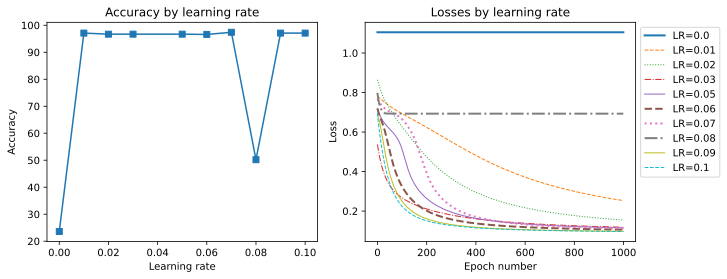

In [12]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1,10)
learningrates = np.round(learningrates, 2)
# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),epochs))


# loop through learning rates
for i,lr in enumerate(learningrates):
  
    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()
# Create a colormap
cmap = plt.get_cmap('tab10')

# Define custom line styles
line_styles = [
    ('-', 2),   # Solid line, bold
    ('--', 1),  # Dashed line, normal
    (':', 1),   # Dotted line, normal
    ('-.', 1),  # Dash-dot line, normal
    ('-', 1),   # Solid line, normal
    ('--', 2),  # Dashed line, bold
    (':', 2),   # Dotted line, bold
    ('-.', 2),  # Dash-dot line, bold
    ('-', 1),   # Solid line, normal
    ('--', 1)   # Dashed line, normal
]

# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

# Plot losses by learning rate with customized line styles
for i, lr in enumerate(learningrates):
    linestyle, linewidth = line_styles[i % len(line_styles)]
    ax[1].plot(allLosses[i], label=f'LR={lr}', color=cmap(i % 10), linestyle=linestyle, linewidth=linewidth)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

# Add legend outside of the second subplot
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

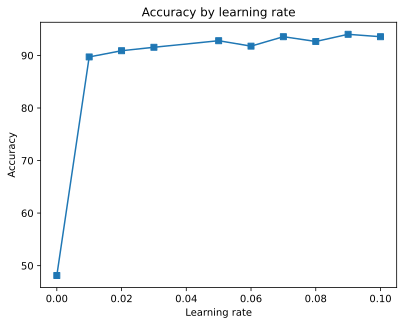

In [13]:
sum(torch.tensor(accByLR)>70)/len(accByLR)
# Number of experiments to conduct
Exps = 100

# Storing the results
# Instiate at zero
accMeta = np.zeros((Exps,len(learningrates)))

# fnumber of epochs
epochs = 1000

# now for the experiment
for i in range(Exps):
  for j,lr in enumerate(learningrates):
    
    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accMeta[i,j] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

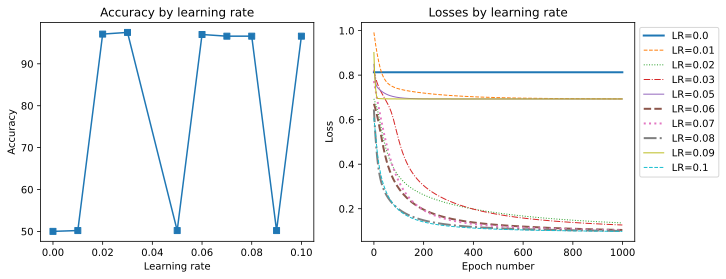

In [14]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1,10)
learningrates = np.round(learningrates, 2)
# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),epochs))


# loop through learning rates
for i,lr in enumerate(learningrates):
  
    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()
# Create a colormap
cmap = plt.get_cmap('tab10')

# Define custom line styles
line_styles = [
    ('-', 2),   # Solid line, bold
    ('--', 1),  # Dashed line, normal
    (':', 1),   # Dotted line, normal
    ('-.', 1),  # Dash-dot line, normal
    ('-', 1),   # Solid line, normal
    ('--', 2),  # Dashed line, bold
    (':', 2),   # Dotted line, bold
    ('-.', 2),  # Dash-dot line, bold
    ('-', 1),   # Solid line, normal
    ('--', 1)   # Dashed line, normal
]

# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

# Plot losses by learning rate with customized line styles
for i, lr in enumerate(learningrates):
    linestyle, linewidth = line_styles[i % len(line_styles)]
    ax[1].plot(allLosses[i], label=f'LR={lr}', color=cmap(i % 10), linestyle=linestyle, linewidth=linewidth)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

# Add legend outside of the second subplot
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [15]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.6000)

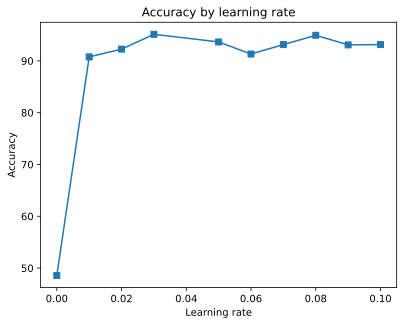

In [16]:
# Number of experiments to conduct
Exps = 100

# Storing the results
# Instiate at zero
accMeta = np.zeros((Exps,len(learningrates)))

# fnumber of epochs
epochs = 1000

# now for the experiment
for i in range(Exps):
  for j,lr in enumerate(learningrates):
    
    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accMeta[i,j] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

--- Experiment 1 & 2: Varying class_sep and LR ---


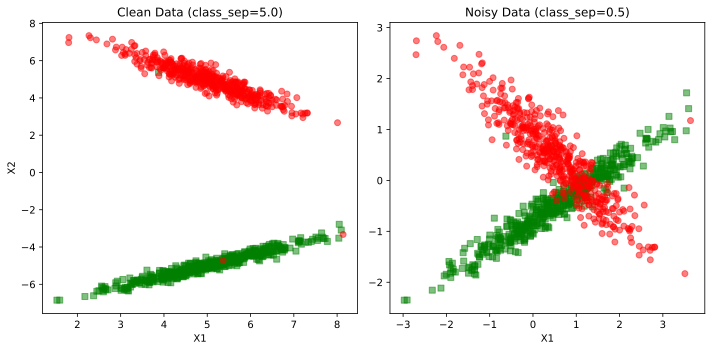


Running analysis on: Clean Data (sep=5.0)


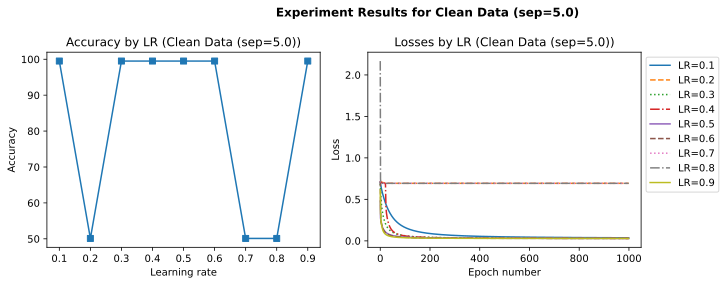


Running analysis on: Noisy Data (sep=0.5)


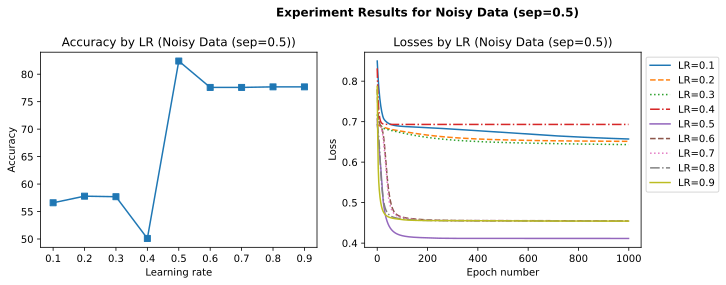

In [17]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# --- Refactored Functions ---
def CreateModel(learningRate):
  """Builds the ANN, loss function, and optimizer."""
  ANN = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
  )
  
  # loss function
  lossfunc = nn.BCEWithLogitsLoss()
  
  # optimizer
  optim = torch.optim.SGD(ANN.parameters(), lr=learningRate)
  
  return ANN, lossfunc, optim

def train(ANNmodel, data_train, labels_train, lossfunc, optim, epochs=1000):
    """Trains the model and returns losses, predictions, and accuracy."""
    losses = torch.zeros(epochs)
    
    for i in range(epochs):
        ANNmodel.train() # Set to train mode
        pred = ANNmodel(data_train)
        
        loss = lossfunc(pred, labels_train)
        losses[i] = loss.item() # Use .item() to get scalar

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()
  
    # final forward pass in eval mode
    ANNmodel.eval() # Set to eval mode
    with torch.no_grad(): # Disable gradient tracking
        predictions = ANNmodel(data_train)
    
    # compute the predictions and report accuracy
    # (predictions>0) is the correct threshold for BCEWithLogitsLoss
    totalacc = 100 * torch.mean(((predictions > 0) == labels_train).float())
    
    return losses, predictions, totalacc

# --- Experiment 1 & 2: LR 0.1-0.9 on Clean vs. Noisy Data ---
print("--- Experiment 1 & 2: Varying class_sep and LR ---")

# 1. Define datasets
# Using n_clusters_per_class=1 for clearer separation
X_clean, y_clean = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=5.0, random_state=42)
data_clean = torch.tensor(X_clean).float()
labels_clean = torch.tensor(y_clean).float().view(-1, 1)

X_noisy, y_noisy = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)
data_noisy = torch.tensor(X_noisy).float()
labels_noisy = torch.tensor(y_noisy).float().view(-1, 1)

# Plot the datasets
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(data_clean[labels_clean.squeeze()==0, 0], data_clean[labels_clean.squeeze()==0, 1], 'gs', alpha=0.5)
ax[0].plot(data_clean[labels_clean.squeeze()==1, 0], data_clean[labels_clean.squeeze()==1, 1], 'ro', alpha=0.5)
ax[0].set_title('Clean Data (class_sep=5.0)')
ax[0].set_xlabel('X1'), ax[0].set_ylabel('X2')
ax[1].plot(data_noisy[labels_noisy.squeeze()==0, 0], data_noisy[labels_noisy.squeeze()==0, 1], 'gs', alpha=0.5)
ax[1].plot(data_noisy[labels_noisy.squeeze()==1, 0], data_noisy[labels_noisy.squeeze()==1, 1], 'ro', alpha=0.5)
ax[1].set_title('Noisy Data (class_sep=0.5)')
ax[1].set_xlabel('X1')
plt.tight_layout()
plt.show()

# 2. Define new LR range and parameters
learningrates_new = np.arange(0.1, 1.0, 0.1) # 0.1 to 0.9
epochs = 1000

datasets_to_run = [('Clean Data (sep=5.0)', data_clean, labels_clean),
                   ('Noisy Data (sep=0.5)', data_noisy, labels_noisy)]

# 3. Run the experiment loops
for title, data, labels in datasets_to_run:
    print(f"\nRunning analysis on: {title}")
    accByLR = []
    allLosses = np.zeros((len(learningrates_new), epochs))

    for i, lr in enumerate(learningrates_new):
        # Create a new model for each LR
        ANN, lossfunc, optim = CreateModel(lr)
        # Use refactored train function
        losses, predictions, totalacc = train(ANN, data, labels, lossfunc, optim, epochs)
        accByLR.append(totalacc.item()) # Use .item()
        allLosses[i, :] = losses.detach().numpy() # Store as numpy array

    # 4. Plot the results for this dataset
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy plot
    ax[0].plot(learningrates_new, accByLR, 's-')
    ax[0].set_xlabel('Learning rate')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_title(f'Accuracy by LR ({title})')
    
    # Loss plot
    cmap = plt.get_cmap('tab10')
    line_styles = ['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']
    for i, lr in enumerate(learningrates_new):
        ax[1].plot(allLosses[i], label=f'LR={lr:.1f}', 
                   color=cmap(i % 10), linestyle=line_styles[i % 10])
    
    ax[1].set_title(f'Losses by LR ({title})')
    ax[1].set_xlabel('Epoch number')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    fig.suptitle(f'Experiment Results for {title}', fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust for legend
    plt.show()


--- Experiment 3: Heatmap of Accuracy vs. LR over 100 Experiments ---
Running 100 experiments for 10 learning rates... (This may take a moment)
  Completed experiment 20/100
  Completed experiment 40/100
  Completed experiment 60/100
  Completed experiment 80/100
  Completed experiment 100/100
Experiment complete. Generating heatmap.


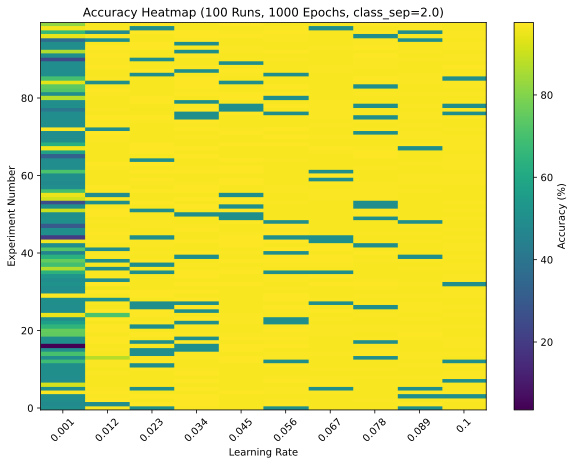

In [18]:
# --- Experiment 3: Heatmap ---
print("\n--- Experiment 3: Heatmap of Accuracy vs. LR over 100 Experiments ---")

# Use original data and LR range from notebook for this specific experiment
X_orig, y_orig = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, class_sep=2.0, random_state=42)
data_orig = torch.tensor(X_orig).float()
labels_orig = torch.tensor(y_orig).float().view(-1, 1)

# Original learning rate range
learningrates_orig = np.linspace(.001, .1, 10) 
Exps = 100
epochs = 1000 # As defined in notebook

accMeta = np.zeros((Exps, len(learningrates_orig)))

print(f"Running {Exps} experiments for {len(learningrates_orig)} learning rates... (This may take a moment)")

for i in range(Exps):
    if (i + 1) % 20 == 0:
        print(f"  Completed experiment {i+1}/{Exps}")
    for j, lr in enumerate(learningrates_orig):
        # Create a new model for each run
        ANN, lossfunc, optim = CreateModel(lr)
        # Train it on the original data
        losses, predictions, totalacc = train(ANN, data_orig, labels_orig, lossfunc, optim, epochs)
        accMeta[i, j] = totalacc.item() # Store accuracy

print("Experiment complete. Generating heatmap.")

# Plot the heatmap
plt.figure(figsize=(10, 7))
plt.imshow(accMeta, aspect='auto', origin='lower',
           cmap='viridis', extent=[-0.5, len(learningrates_orig)-0.5, -0.5, Exps-0.5])

plt.xticks(np.arange(len(learningrates_orig)), labels=np.round(learningrates_orig, 3), rotation=45)
plt.xlabel('Learning Rate')
plt.ylabel('Experiment Number')
plt.title(f'Accuracy Heatmap ({Exps} Runs, {epochs} Epochs, class_sep=2.0)')
plt.colorbar(label='Accuracy (%)')
plt.show()